### 《》在社群媒體影響力與輿情分析
* 課程：社群媒體分析
* 授課教授：黃三益
* 組別：Group_7
* 組員：B094020019 陳羽楨、B104020035 陳達豐、B104020041 張世諭、B084011022 王煜凱、M124020025 吳安倢、M124020034 游凱翔、M124020041 洪維彤、M124020051 李柏翰

## 大綱
1. 資料介紹
  * 1.1 資料來源
  * 1.2 分析動機&目的
2. 資料前處理
  * 2.1 套件下載
  * 2.2 資料匯入
  * 2.3 資料初步清理
  * 2.4 斷句
  * 2.5 斷詞
  * 2.6 計算去除停用字及更新字典前的詞頻1
  * 2.7 視覺化結果
  * 2.8 移除停用字
  * 2.9 更新停用字字典
  * 2.10 更新斷詞字典
  * 2.11 比較清理前後的文字雲
3. lexicon-base 情緒分析
  * 3.1 準備LIWC情緒字典
  * 3.2 情緒字典與斷詞結果進行合併
  * 3.3 正負向情緒詞彙頻率折線圖圖
  * 3.4 正負向情緒詞彙比例折線圖圖
  * 3.5 正負向情緒分數折線圖圖
  * 3.6 文章為單位的情緒分析
  * 3.7 情緒代表字
  * 3.8 檢查情緒詞是否符合本文本
  * 3.9 重新計算情緒
4. CKIP 搭配 SnowNLP



### 1. 資料介紹

* 資料來源
    * 文字平台收集PPT平台上與《周處除三害》相關的文章
    * 來源：電影版、八卦版
* 關鍵字：周處除三害
* 時間： 2023-10-01 ~ 2024-03-01
* 資料筆數：共 414 篇文章


* 分析動機

1. 社會意識提升：透過研究社群媒體上的對話和討論，提高公眾對當前社會問題（如環境保護、社會正義等）的認識和關注。
2. 情緒與觀點分析：分析社群媒體用戶對於特定社會問題的情緒和觀點，以了解公眾的態度和可能的分歧點。
3. 趨勢追蹤：追蹤特定社會問題在社群媒體上的討論趨勢，包括話題的熱度變化、關鍵詞的演變等，以評估社會關注度的變化。

* 分析目的
1. 影響力評估：分析《周處除三害》在PTT平台上的關注度，包括點讚、分享、評論等互動數據。
2. 公眾關注度分析：確定與現代社會"三害"相關的話題在社群媒體上的關注度。這包括識別哪些問題最受關注以及隨時間變化的趨勢。
3. 影響力者和意見領袖分析：識別在討論這些"三害"問題中具有重要影響力的社群媒體意見領袖。這包括分析貼文的互動量（如點讚、分享、評論數）以及它們在話題推廣中的角色。

### 2. 資料前處理

### 2.1 套件下載

!pip install 套件名稱

In [23]:
#%pip install jieba
# !pip install wordcloud
# !pip install pandas

Note: you may need to restart the kernel to use updated packages.


引入套件

In [1]:
import pandas as pd
import jieba
import jieba.analyse

import re
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from datetime import datetime
from collections import Counter
from PIL import Image, ImageSequence

這邊因為我文字雲中文字形出問題，所以在尋找 matplotlib 路徑，還有設定中文字形

In [118]:
# 參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
print(matplotlib.__file__)

c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\matplotlib\__init__.py


In [2]:
import matplotlib

In [3]:

import matplotlib.font_manager
 
b = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in b:
    print(i)

AGA Arabesque
AGA Arabesque Desktop
Agency FB
Agency FB
Akhbar MT
Akhbar MT
Aldhabi
Algerian
Ami R
Andalus
Angsana New
Arabic Typesetting
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
BIZ UDGothic
BIZ UDGothic
BIZ UDMincho
Bahnschrift
Baskerville Old Face
Batang
Bauhaus 93
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bold Italic Art
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Browallia New
Brush Script MT
Calibri
Calibri
Calibri
Calibri
Calibri
Calibri
Californian FB
Californian FB
Californian FB
Calisto MT
Calisto MT
Calisto MT
Calisto MT
Cambria
Cambria
Cambria
Cambria
Candara
Candara
Candara
Candara
Candara
Candara
Castellar
Centaur
Century
Cen

In [4]:
# 設定圖的字體大小
plt.rcParams['font.size'] = 14

# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ["./raw_data/TaipeiSansTCBeta-Regular.ttf"] #Taipei Sans TC Beta 這網路找的字形
fprop = fm.FontProperties(fname="./raw_data/TaipeiSansTCBeta-Regular.ttf")

# 設定文字雲中文字體路徑
FontPath = 'raw_data/TaipeiSansTCBeta-Regular.ttf' # 設定字型

In [90]:
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'

### 2.2 資料匯入

需要先去網路大學 TarFlow工作流程系統 下載CSV檔 movie.csv

In [12]:
df = pd.read_csv('raw_data/movie.csv')
print(f"PTT 共有 {df.shape[0]} 篇文章") 

#將artDate欄位只留下 年/月/日
df['artDate'] = pd.to_datetime(df['artDate']).dt.date
df.head()


PTT 共有 430 篇文章


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,Hsins,Gossiping,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tearness"", ""...",61.223.222.252,2023-10-06 01:37:57,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,HNCB2880,Gossiping,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""spzper"", ""cm...",223.136.68.101,2023-10-07 01:34:56,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,rainiem3m3,Gossiping,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",49.216.131.16,2023-10-07 01:35:28,ptt


### 2.3 資料初步清理
清除內文為空值的文章

透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號。

清除不重要的字如換行

網址留下來當unique id

In [14]:
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影。開播前照慣例都會放過幾天要上映的預告片。之前加減都會放些...
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,今年金馬獎最佳男主角競爭激烈。台北電影節最佳男主角，疫起 王柏傑。金馬獎影帝，周處除三害 阮...
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,如題啦，最近聽朋友在那邊聊金馬入圍名單，聊一聊就聽到他們在說租屋的事，什麼租房子要除三害之類...
3,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,是這樣的啦。軟今天演出周處除三害。三害是大白虎 大蛟龍。還有一害是什麼？。不是都說周處除三害嗎，
4,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,今天周處除三害上映 最近也一堆金馬入圍新聞。但有人知道阮經天之前是如何嗎。用台灣健保在台灣長...
5,https://www.ptt.cc/bbs/Gossiping/M.1696719803....,[新聞]（新片搶鮮看）《蒼鷺與少年》奇幻旅程,2023-10-08,備註請放最後面 違者新聞文章刪除\n1.媒體來源:自由時報\n\n2.記者署名:許世穎\n\...,備註請放最後面 違者新聞文章刪除，1.媒體來源:自由時報。2.記者署名:許世穎。3.完整新聞...
6,https://www.ptt.cc/bbs/Gossiping/M.1696821659....,[問卦]大膽預測周處除三害會破億,2023-10-09,如題，昨天去電影院看周處除三害，說看過的國片裡面第一名的，超好看的，所以我大膽預測會破億，還...,如題，昨天去電影院看周處除三害，說看過的國片裡面第一名的，超好看的，所以我大膽預測會破億，還...
7,https://www.ptt.cc/bbs/Gossiping/M.1697185829....,[問卦]台灣人包容度是不是過高了,2023-10-13,只有我看到這個嗎\nhttps://i.imgur.com/P7BmXGq.jpg\n周處除...,只有我看到這個嗎， 故事線是會想去看一下，畢竟麋先生一直是我的愛團。但是搞不懂為何主角會選阮...
8,https://www.ptt.cc/bbs/Gossiping/M.1697380547....,[新聞]錢人豪點名阮經天《周處》涉抄襲！周一發,2023-10-15,記者江芷稜／綜合報導\n2023-10-15 19:33:04\n｜\n2023-10-15...,記者江芷稜／綜合報導，2023-10-15 19:33:04，｜，2023-10-15 21...
9,https://www.ptt.cc/bbs/Gossiping/M.1697607887....,[新聞]錢人豪正式提告了！公開《周處除三害》,2023-10-18,1.媒體來源:\n三立\n\n2.記者署名:\n2023/10/18 12:07\n娛樂中心...,1.媒體來源:，三立。2.記者署名:，2023/10/18 12:07，娛樂中心／徐珮華報導...


In [15]:
clear_df

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影。開播前照慣例都會放過幾天要上映的預告片。之前加減都會放些...
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,今年金馬獎最佳男主角競爭激烈。台北電影節最佳男主角，疫起 王柏傑。金馬獎影帝，周處除三害 阮...
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,如題啦，最近聽朋友在那邊聊金馬入圍名單，聊一聊就聽到他們在說租屋的事，什麼租房子要除三害之類...
3,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,是這樣的啦。軟今天演出周處除三害。三害是大白虎 大蛟龍。還有一害是什麼？。不是都說周處除三害嗎，
4,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,今天周處除三害上映 最近也一堆金馬入圍新聞。但有人知道阮經天之前是如何嗎。用台灣健保在台灣長...
...,...,...,...,...,...
425,https://www.ptt.cc/bbs/movie/M.1710573924.A.E0...,[普雷]周處除三害,2024-03-16,周處除三害的三害香港仔、尊者、陳桂林到底代表的是那三害？\n\n香港仔代表的其實是資本主義，...,周處除三害的三害香港仔、尊者、陳桂林到底代表的是那三害？。香港仔代表的其實是資本主義，中國群...
426,https://www.ptt.cc/bbs/movie/M.1710601237.A.9F...,"Re:[討論]原來""熱辣滾燙""是改編日片""百元之戀""呀!!",2024-03-16,不知道在反三小，我覺得看電影就看電影\n一直計較奇怪的點\n\n當男人戀愛時，也是翻拍阿！！...,不知道在反三小，我覺得看電影就看電影，一直計較奇怪的點。當男人戀愛時，也是翻拍阿！！，他甚至...
427,https://www.ptt.cc/bbs/movie/M.1710604377.A.13...,[新聞]阮經天被鎖定！億萬導演認了：我一直在打,2024-03-16,新聞網址：\nhttps://reurl.cc/13NpbW\n〔記者廖俐惠／台北報導〕阮經...,新聞網址：， Ng畫的阿邦3D設計，因此促成合作，他提到設計師說3個角色最難畫的，是弟弟，因...
428,https://www.ptt.cc/bbs/movie/M.1710660412.A.06...,[新聞]《周處除三害》賣破21億！阮經天被敲碗,2024-03-17,新聞網址：\nhttps://star.ettoday.net/news/2701953\n...,新聞網址：， 香港仔 陳，桂林」。網友紛紛湧入留言恭喜票房突破新高，更有人提醒：「記得報一下...


### 2.4 斷句
中文主要以標點符號進行斷句，並清除空的字串



In [16]:
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)

sent_df.head(10)

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播前照慣例都會放過幾天要上映的預告片
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,之前加減都會放些國外的預告片
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,結果昨天播了三部電影預告片全部都是臺灣國產
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,周處除三害
5,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,女鬼橋
6,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,動物感傷の清晨
7,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,尤其是動物感傷那部的預告片有夠煽情的啦
8,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,回到重點
9,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,今年是國片元年嗎


### 2.5 斷詞
斷詞引擎設定：使用 Jieba 當作斷詞系統。

Jieba原先內建為簡體字字典，但我們可以使用繁體字典來做為替換，結果會比較好。

另外可能還有一些專有名詞是沒有被包含在預設字典當中，我們也可以使用自定義字典的方式加入，或者使用參數的形式帶入。


In [17]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
jieba.set_dictionary('dict/dict.txt')

斷詞前先將標點符號清除，並清除空字串

正規表達式 (Regular Expression) 是透過簡單的特定字符規則，從文本中找尋符合對應規則的字串，幾乎常見的程式語言，都有支援正規表達式的操作。

以下提供幾個範例：

* \w：匹配任何一個單詞字符，包括字母、數字和下劃線，等同於 [a-zA-Z0-9_]

* \s：匹配任何一個空白字符，包括空格、換行等

* [ ]：用於定義一個字符集合，匹配集合中的任何一個字符。 例如: [abc] = 匹配字符 a、b 或 c。

* [^ ]：用於定義一個否定字符集合，匹配不在集合中的任何一個字符。 例如: [^abc] = 匹配除了 a、b 和 c 以外的任何字符。

* +：匹配前面提及的元素一次或多次。

In [18]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df.head(10)

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播前照慣例都會放過幾天要上映的預告片
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,之前加減都會放些國外的預告片
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,結果昨天播了三部電影預告片全部都是臺灣國產
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,周處除三害
5,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,女鬼橋
6,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,動物感傷の清晨
7,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,尤其是動物感傷那部的預告片有夠煽情的啦
8,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,回到重點
9,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,今年是國片元年嗎


使用jieba進行斷詞

In [19]:
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df.head(10)

Building prefix dict from c:\Users\penny\Desktop\SocialAnalysis_3_29\dict\dict.txt ...
Dumping model to file cache C:\Users\penny\AppData\Local\Temp\jieba.u2ce831e2ca1a6524072435f2a16ddbb5.cache
Loading model cost 0.493 seconds.
Prefix dict has been built successfully.


,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,我們
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,天演
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例


### 2.6 計算去除停用字及更新字典前的詞頻

In [20]:
# freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).reset_index()
freq_df.columns = ['word', 'count']
freq_df = freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)
freq_df.head(10)

,word,count
0,周處,540
1,電影,474
2,三害,431
3,台灣,377
4,最佳,305
5,桂林,242
6,票房,210
7,就是,205
8,中國,180
9,香港,174


In [21]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

# 太長了先隱藏
# freq_dict

### 2.7 視覺化結果

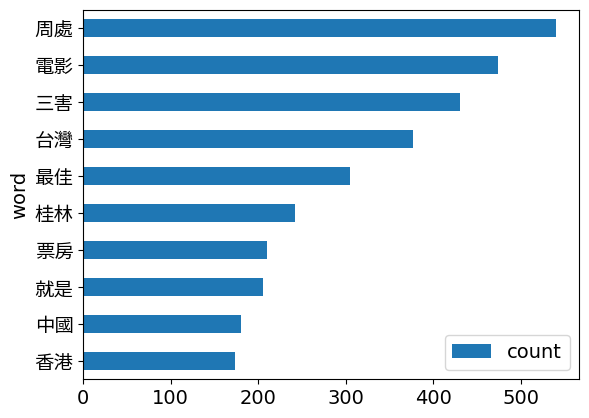

In [93]:
freq_df.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.yticks(fontproperties=fprop)
plt.show()

繪製文字雲


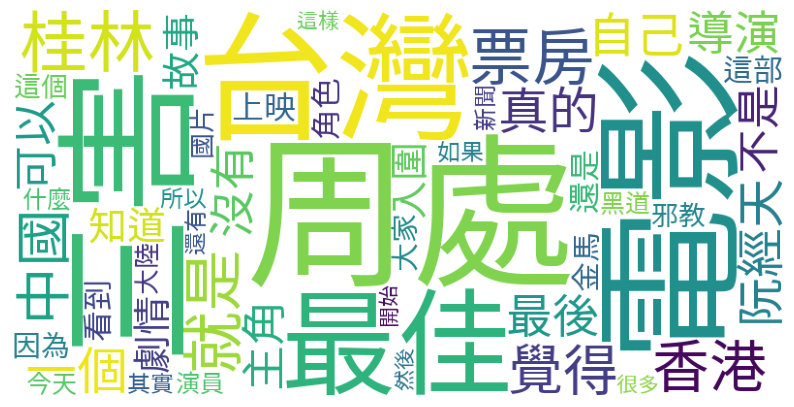

In [23]:
# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.8 移除停用字

In [24]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

移除dataframe中的停用字

In [25]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df.head(10)

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,天演
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,放過


計算去除停用字後的詞頻

再次繪製長條圖

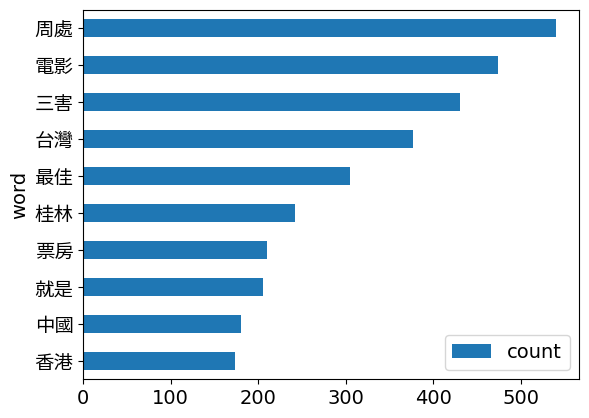

In [26]:
# freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df_nostop = pd.DataFrame(pd.value_counts(word_df['word'])).reset_index()
freq_df_nostop.columns = ['word', 'count']  # Rename the columns to 'word' and 'count'
freq_df_nostop = freq_df_nostop.sort_values(by='count', ascending=False).reset_index(drop=True)

freq_df_nostop.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.yticks(fontproperties=fprop)
plt.show()

再次繪製文字雲


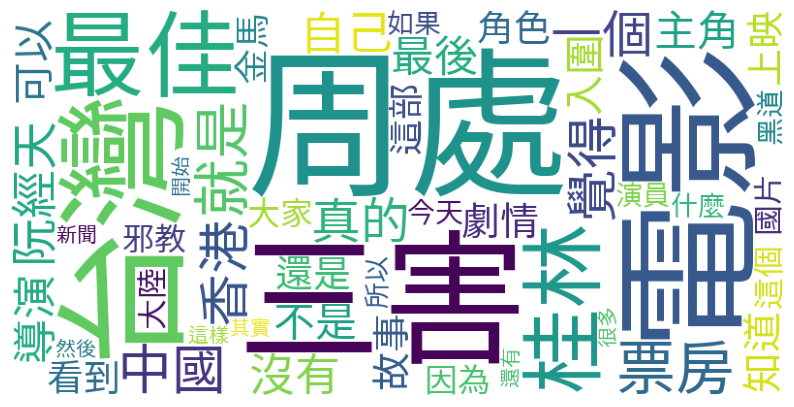

In [27]:
freq_dict_nostop = freq_df_nostop.set_index('word').to_dict()
freq_dict_nostop = freq_dict_nostop['count']

# 繪製文字雲
wordcloud_nostop = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_nostop.generate_from_frequencies(freq_dict_nostop)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop)
plt.axis('off')
plt.show()

### 2.9 更新停用字字典

In [28]:
# 參數形式手動加入停用字
stopwords_manual = ["周處", "三害", "看到", "XD", "一下", "這邊", "from", "on", "Sent", "10", "JPTT", "my"]
stopwords.extend(stopwords_manual)

In [29]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2.head(10)

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,天演
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,放過


### 2.10 更新斷詞字典

a. 自行定義的斷詞字典

In [30]:
# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
jieba.load_userdict("dict/user_dict.txt")

重新斷詞

In [31]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]
word_df_updated

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,我們
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經
...,...,...,...,...,...
10869,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,哪些
10870,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,大眾
10870,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,表演
10871,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,非常


重新移除停用字

In [32]:
nostop_df_updated = word_df_updated[~word_df_updated['word'].isin(stopwords)]

nostop_df_updated

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,天演
...,...,...,...,...,...
10868,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,男人味
10869,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,未來
10870,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,大眾
10870,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,表演


重新進行斷詞及清除停用字

In [33]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]

#去除停用字
nostop_df_updated = word_df_updated[~word_df_updated['word'].isin(stopwords)]

nostop_df_updated.head(10)

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,天演
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,放過


重新計算詞頻

In [34]:
# freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).reset_index()
freq_df_updated.columns = ['word', 'count']  # Rename the columns to 'word' and 'count'
freq_df_updated = freq_df_updated.sort_values(by='count', ascending=False).reset_index(drop=True)

freq_df_updated

,word,count
0,電影,474
1,台灣,377
2,最佳,305
3,桂林,242
4,票房,210
...,...,...
10170,丟一邊,1
10171,孝順,1
10172,推推,1
10173,集氣,1


重新繪製詞頻長條圖

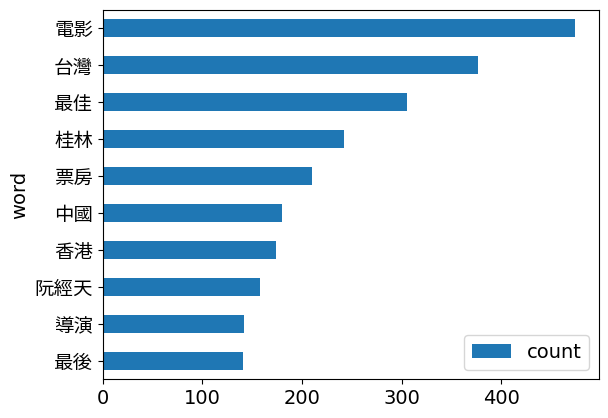

In [87]:
freq_df_updated.head(10).plot.barh(x='word', y='count').invert_yaxis()
plt.yticks(fontproperties=fprop)
plt.show()


繪製文字雲

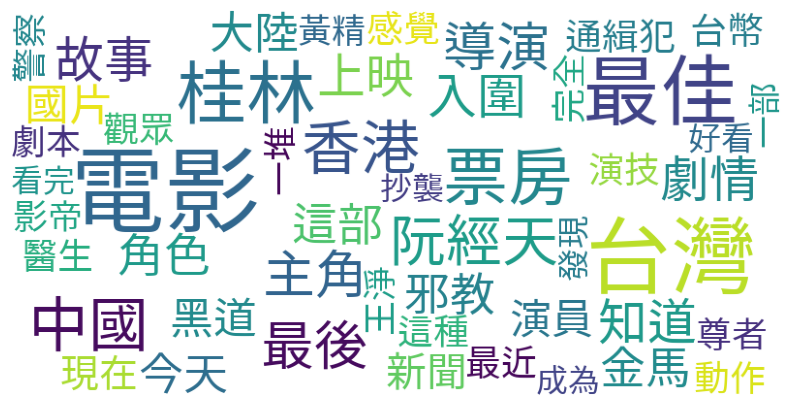

In [36]:
freq_dict_updated = freq_df_updated.set_index('word').to_dict()
freq_dict_updated = freq_dict_updated['count']

# 繪製文字雲
wordcloud_after = WordCloud(background_color='white', width=800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_after.generate_from_frequencies(freq_dict_updated)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_after)
plt.axis('off')
plt.show()

### 2.11 比較清理前後的文字雲

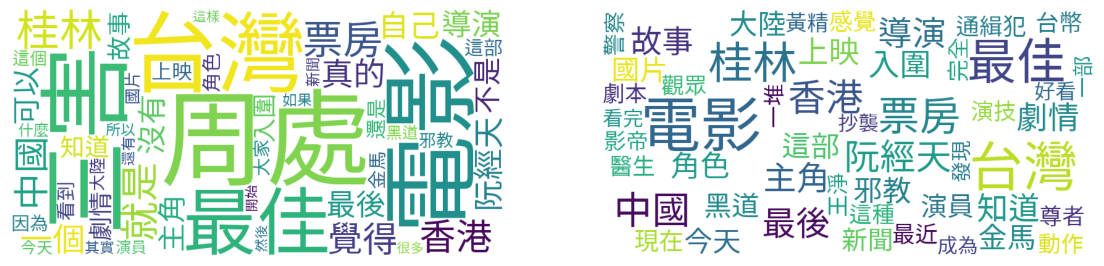

In [37]:
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_after)
plt.axis('off')

plt.show()

# Lexicon-based 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

### 3.1 準備LIWC字典  
- 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版  
>  就英文版的LIWC2007來說，目前包含了64個定義類別。這些類別包括基本的語文向度類別，例如： 22個語文特性類別（如，代名詞、冠詞等百分比）、3個副語言學（paralinguistic）類別（如應和詞、停頓詞等）。除了已經有具有明確定義的語文類別之外，LIWC也另外包含了32個心理特性類別（如，情感詞、認知詞等）、7個個人化類別（如工作、休閒活動等）。再加上程式自動計算出的6個一般描述性類別（總詞數、每句詞數等）以及12個標點符號類別（如句點、逗點等），總計可輸出80個字詞類別。
- https://cliwc.weebly.com/liwc20073542220856.html 
- https://cliwc.weebly.com/35422208563900621029200131228933521259913549826126.html

In [54]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [55]:
liwc_dict['sentiments'].describe()

count       4682
unique         6
top       affect
freq        2061
Name: sentiments, dtype: object

### 3.2 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。

In [56]:
ptt_liwc_df = pd.merge(nostop_df_updated[["artUrl","artTitle", "artDate", "artContent", "word"]], liwc_dict, how="left")
ptt_liwc_df

,artUrl,artTitle,artDate,artContent,word,sentiments
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天,NaN
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬,NaN
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神,NaN
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天,NaN
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影,NaN
...,...,...,...,...,...,...
35639,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,男人味,NaN
35640,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,未來,NaN
35641,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,大眾,NaN
35642,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,[新聞]阮經天5件事！28歲奪影帝陷低潮,2024-03-17,阮經天5件事！28歲奪影帝陷低潮 《周處除三害》瘋魔演技封神\n\nNOWNEWS\n\n記...,表演,NaN


### 3.3 正負向情緒詞彙頻率折線圖圖

In [57]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative") 
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
2,2023-10-02,negative,3
3,2023-10-02,positive,14
7,2023-10-03,negative,1
8,2023-10-03,positive,128
11,2023-10-04,negative,16
...,...,...,...
287,2024-03-15,positive,14
292,2024-03-16,negative,40
293,2024-03-16,positive,42
298,2024-03-17,negative,28


findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

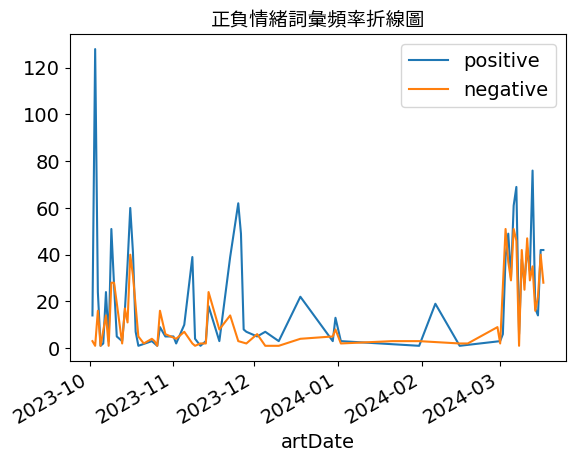

In [58]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

2月推測可能是上應在metflix或是因單篇正面詞彙較多導致的誤差

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

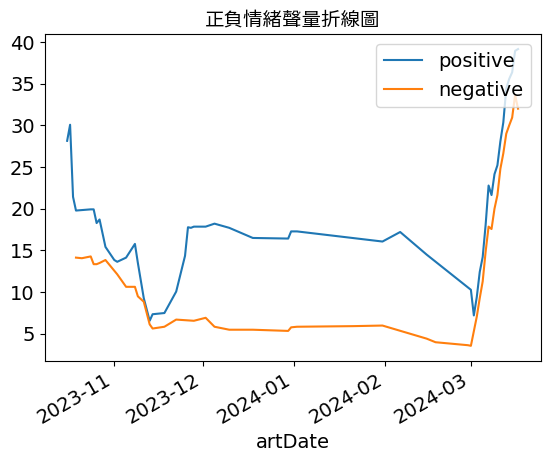

In [59]:
# moving average

colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒聲量折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

3月討論度大幅成長，猜測可能是因為在中國大陸上映(3/1)，導致討論度急遽攀升  

### 3.4 正負向情緒詞彙比例折線圖圖

In [60]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,artDate,sentiments,size,ratio
2,2023-10-02,negative,3,0.176471
3,2023-10-02,positive,14,0.823529
7,2023-10-03,negative,1,0.007752
8,2023-10-03,positive,128,0.992248
11,2023-10-04,negative,16,0.400000
...,...,...,...,...
287,2024-03-15,positive,14,0.388889
292,2024-03-16,negative,40,0.487805
293,2024-03-16,positive,42,0.512195
298,2024-03-17,negative,28,0.400000


Text(0.5, 1.0, '正負情緒比例折線圖')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

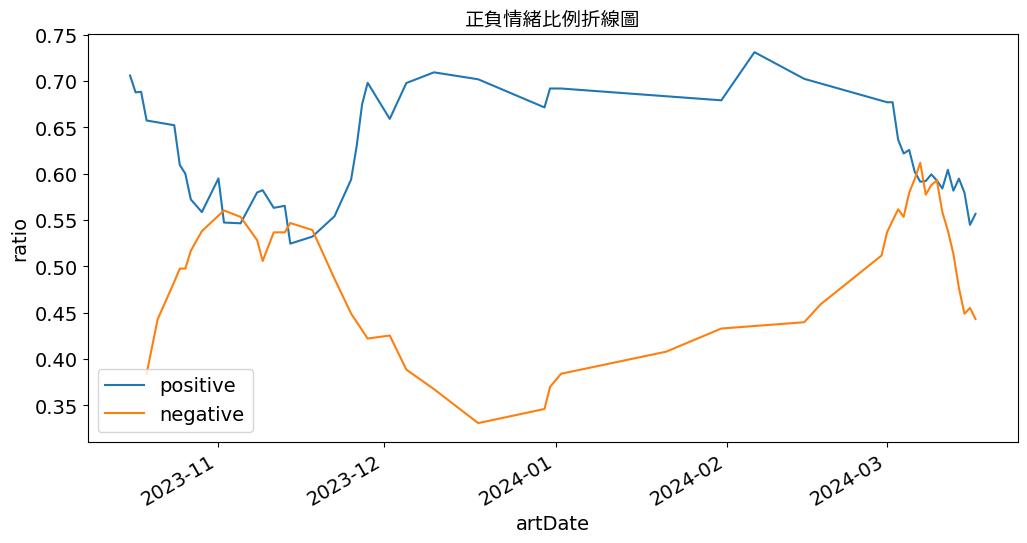

In [61]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

fig, ax = plt.subplots(figsize=(12, 6))

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

老師說有ratio的不用管

### 正負向情緒分數折線圖

In [62]:
sentiment_count

,artDate,sentiments,size,ratio
2,2023-10-02,negative,3,0.176471
3,2023-10-02,positive,14,0.823529
7,2023-10-03,negative,1,0.007752
8,2023-10-03,positive,128,0.992248
11,2023-10-04,negative,16,0.400000
...,...,...,...,...
287,2024-03-15,positive,14,0.388889
292,2024-03-16,negative,40,0.487805
293,2024-03-16,positive,42,0.512195
298,2024-03-17,negative,28,0.400000


In [63]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,negative,positive
0,2023-10-02,3.0,14.0
1,2023-10-03,1.0,128.0
2,2023-10-04,16.0,24.0
3,2023-10-05,1.0,1.0
4,2023-10-06,0.0,2.0


In [64]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["negative"]
)
ptt_sentiment_value.head()

,artDate,negative,positive,sentiment_value
0,2023-10-02,3.0,14.0,11.0
1,2023-10-03,1.0,128.0,127.0
2,2023-10-04,16.0,24.0,8.0
3,2023-10-05,1.0,1.0,0.0
4,2023-10-06,0.0,2.0,2.0


Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

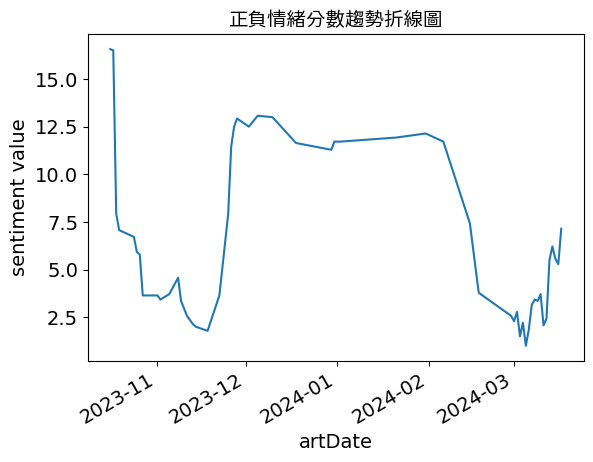

In [65]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

可以看出10月末到11月中分數趨勢線下降，但從上面的聲量折線圖我們可以看出應該是討論度大幅度下降。

### 3.6 文章為單位的情緒分析

In [66]:
sentiment_count_by_article = pd.DataFrame(
    ptt_liwc_df.groupby(["artUrl","sentiments"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})
sentiment_count_by_article

,artUrl,sentiments,size
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,affect,2
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,negative,2
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,sad,2
3,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,affect,5
4,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,anger,1
...,...,...,...
1067,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,affect,34
1068,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,anger,3
1069,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,anx,2
1070,https://www.ptt.cc/bbs/movie/M.1710660881.A.44...,negative,6


In [67]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

,artUrl,affect,anger,anx,negative,positive,sad
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2.0,0.0,0.0,2.0,0.0,2.0
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,5.0,1.0,0.0,1.0,3.0,0.0
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,2.0,0.0,0.0,1.0,1.0,0.0
3,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,3.0,0.0,0.0,0.0,2.0,0.0
4,https://www.ptt.cc/bbs/Gossiping/M.1696821659....,1.0,0.0,0.0,0.0,1.0,0.0


In [68]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
    ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

,artUrl,affect,anger,anx,negative,positive,sad,sentiment_value
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2.0,0.0,0.0,2.0,0.0,2.0,-2.0
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,5.0,1.0,0.0,1.0,3.0,0.0,2.0
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,2.0,0.0,0.0,1.0,1.0,0.0,0.0
3,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,3.0,0.0,0.0,0.0,2.0,0.0,2.0
4,https://www.ptt.cc/bbs/Gossiping/M.1696821659....,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [69]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "正向" if x > 0 else "負向" )
ptt_sentiment_value_by_article

,artUrl,affect,anger,anx,negative,positive,sad,sentiment_value,sentiment_class
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2.0,0.0,0.0,2.0,0.0,2.0,-2.0,負向
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,5.0,1.0,0.0,1.0,3.0,0.0,2.0,正向
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,2.0,0.0,0.0,1.0,1.0,0.0,0.0,負向
3,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,3.0,0.0,0.0,0.0,2.0,0.0,2.0,正向
4,https://www.ptt.cc/bbs/Gossiping/M.1696821659....,1.0,0.0,0.0,0.0,1.0,0.0,1.0,正向
...,...,...,...,...,...,...,...,...,...
320,https://www.ptt.cc/bbs/movie/M.1710519818.A.BA...,21.0,6.0,0.0,11.0,8.0,5.0,-3.0,負向
321,https://www.ptt.cc/bbs/movie/M.1710573924.A.E0...,22.0,4.0,5.0,10.0,11.0,1.0,1.0,正向
322,https://www.ptt.cc/bbs/movie/M.1710601237.A.9F...,5.0,0.0,0.0,1.0,4.0,0.0,3.0,正向
323,https://www.ptt.cc/bbs/movie/M.1710660412.A.06...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,正向


In [70]:
clear_df_sentiment = pd.merge(df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date
clear_df_sentiment

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource,sentiment_class
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt,負向
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt,正向
2,3,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,Hsins,Gossiping,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tearness"", ""...",61.223.222.252,2023-10-06 01:37:57,ptt,負向
3,4,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,HNCB2880,Gossiping,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""spzper"", ""cm...",223.136.68.101,2023-10-07 01:34:56,ptt,NaN
4,5,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,rainiem3m3,Gossiping,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",49.216.131.16,2023-10-07 01:35:28,ptt,正向
...,...,...,...,...,...,...,...,...,...,...,...,...
424,426,https://www.ptt.cc/bbs/movie/M.1710573924.A.E0...,[普雷]周處除三害,2024-03-16,adagiox,movie,周處除三害的三害香港仔、尊者、陳桂林到底代表的是那三害？\n\n香港仔代表的其實是資本主義，...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""n3688"", ""cmt...",180.217.249.254,2024-03-18 01:56:22,ptt,正向
425,427,https://www.ptt.cc/bbs/movie/M.1710601237.A.9F...,"Re:[討論]原來""熱辣滾燙""是改編日片""百元之戀""呀!!",2024-03-16,taot917,movie,不知道在反三小，我覺得看電影就看電影\n一直計較奇怪的點\n\n當男人戀愛時，也是翻拍阿！！...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""ilovedirk41""...",123.192.217.112,2024-03-18 01:56:24,ptt,正向
426,428,https://www.ptt.cc/bbs/movie/M.1710604377.A.13...,[新聞]阮經天被鎖定！億萬導演認了：我一直在打,2024-03-16,yu1164,movie,新聞網址：\nhttps://reurl.cc/13NpbW\n〔記者廖俐惠／台北報導〕阮經...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""jason88223"",...",180.218.234.142,2024-03-18 01:56:24,ptt,NaN
427,429,https://www.ptt.cc/bbs/movie/M.1710660412.A.06...,[新聞]《周處除三害》賣破21億！阮經天被敲碗,2024-03-17,HTC92,movie,新聞網址：\nhttps://star.ettoday.net/news/2701953\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""rtoday"", ""cm...",111.251.92.135,2024-03-18 01:56:26,ptt,正向


In [71]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

,artDate,sentiment_class,size
0,2023-10-02,正向,2
1,2023-10-02,負向,1
2,2023-10-03,正向,4
3,2023-10-04,正向,1
4,2023-10-05,負向,1
...,...,...,...
89,2024-03-15,負向,5
90,2024-03-16,正向,6
91,2024-03-16,負向,6
92,2024-03-17,正向,6


findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

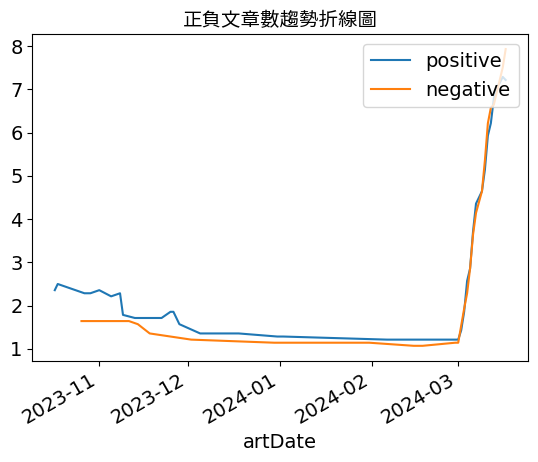

In [72]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "正向"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "負向"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])
# ax.plot(pos["artDate"], pos['size'], color=colors[0])
# ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

本電影在2023/10就已經上映，當時討論度並無明顯成長，3月中國大陸上映後，討論度大幅上升。

### 3.7 情緒代表字

In [73]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

,word,sentiments,size
722,最佳,affect,305
723,最佳,positive,305
30,不錯,affect,44
31,不錯,positive,44
64,作品,affect,40
...,...,...,...
880,煩躁,negative,1
881,熱心,affect,1
882,熱心,positive,1
883,熱愛,affect,1


In [74]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos.head(20)

,word,sentiments,size
723,最佳,positive,305
31,不錯,positive,44
65,作品,positive,40
732,朋友,positive,38
268,喜歡,positive,34
594,成功,positive,22
422,希望,positive,21
953,相信,positive,21
1007,精彩,positive,21
365,娛樂,positive,20


In [75]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg.head(20)

,word,sentiments,size
137,八卦,negative,35
764,死刑,negative,35
721,暴力,negative,34
252,問題,negative,32
897,犯罪,negative,23
1132,詐騙,negative,21
474,復仇,negative,20
517,悲傷,negative,13
1245,隨便,negative,12
535,惡人,negative,12


findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

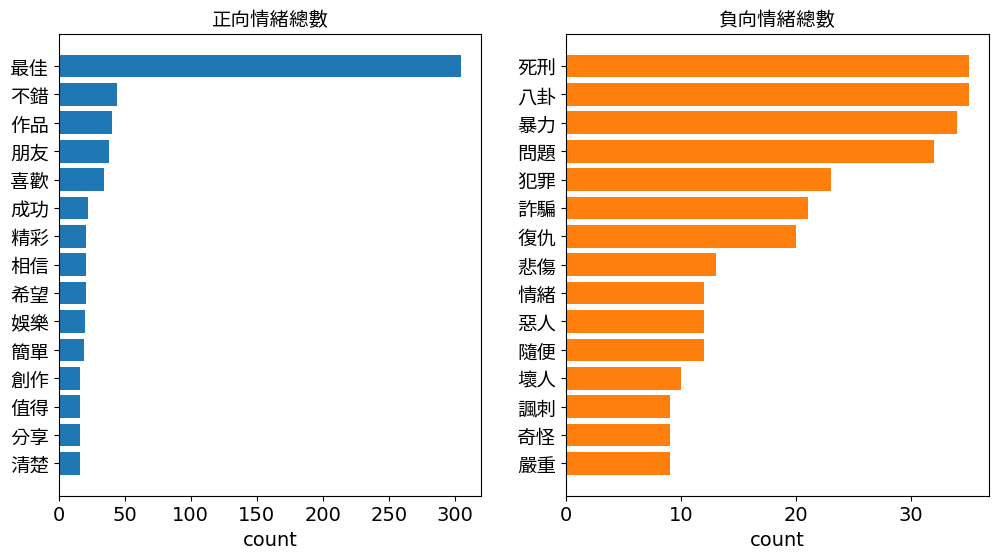

In [76]:
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticks(range(len(pos["word"])))
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticks(range(len(neg["word"])))
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

plt.show()

### 3.8 檢查情緒詞是否符合本文本

In [77]:
filtered_df = sent_df[sent_df['sentence'].str.contains('問題', na=False)]
filtered_df.head()

,artUrl,artTitle,artDate,artContent,sentence
388,https://www.ptt.cc/bbs/Gossiping/M.1699157710....,Re:[新聞]賴清德：組清廉政府贏回人民信任,2023-11-05,其實我過去也是頗為肯定賴清德，至少潔身自愛，個人操守經得起考驗。\n\n然而從2014年觀察...,先證明自己能處理身邊的問題吧
1161,https://www.ptt.cc/bbs/Gossiping/M.1709633704....,[問卦]周處除三害，是不是在台灣被打壓,2024-03-05,昨天看了周處除三害\n\n哇靠，很好看啊！\n\n講卡司有卡司，講演技有演技\n講動作有動作...,當初宣傳是遇到什麼問題
1291,https://www.ptt.cc/bbs/Gossiping/M.1709656829....,[問卦]周處除三害的大boss不是阮經天,2024-03-06,各位水水安安\n\n各位帥帥安安\n\n各位肥宅安安\n\n大家好唷\n\n小妹想要問問大家...,小妹想要問問大家一個問題
1306,https://www.ptt.cc/bbs/Gossiping/M.1709657851....,[問卦]台灣有很多邪教嗎???,2024-03-06,各位水水安安\n\n各位帥帥安安\n\n各位肥宅安安\n\n大家好唷\n\n小妹想要問問大家...,小妹想要問問大家一個問題
1421,https://www.ptt.cc/bbs/Gossiping/M.1709716893....,[問卦]現代台灣拍周處除三害是哪三害?,2024-03-06,剛下班在塞車的各位安安阿，啊我就心齋橋哥啦\n\n好不容易有比較有話題的國片上映了\n\n片...,現在台灣問題也是蠻多的


In [78]:
for sentence in filtered_df['sentence'].to_list():
    print(sentence)
    print("=========================")

先證明自己能處理身邊的問題吧
當初宣傳是遇到什麼問題
小妹想要問問大家一個問題
小妹想要問問大家一個問題
現在台灣問題也是蠻多的
出來幫大眾解決詐騙 食安 販毒等問題
橫著走都沒問題
是政策問題還是市場問題
現在的台灣有虐童 食安 毒品 槍械等社會問題
怎會有除三害的問題
小妹想要問問大家一個問題
小妹想要問問大家一個問題
小妹想要問問大家一個問題
但一直認為國片最大的問題還是流暢度跟劇情
但覺得很多國片一直有如上所述的問題
這個靈修中心是有問題的
合理性和邏輯性已經不是我在意的問題
見到尊者就知道尊者有問題啦XD那
雖然早就知道教主有問題但一開始還真的包裝的很好
劇情深度涉及了台灣的新興宗教問題
雖然還是有主角威能太過強大或是這樣那樣的小問題
他電影問題就不少
 有時是一種環境問題
這兩部我覺得都有一個問題 就是警察的描寫似乎有點多餘 我的意思是即便這些警察 不去
就只是選擇問題而已
善與惡或許已經不是最重要的問題
或者問題可以改成
因此最終需要有人弄髒雙手替大家解決問題
這也反映了這個現代社會的問題當透過正規方式無法解決我
們眼前的問題時
而是思考問題的根源


### 3.9 重新計算情緒   

In [79]:
# 設定要移除的字詞列表
words_to_remove = ['朋友','創作','娛樂','自由','相信','自我','決定','八卦版']

# 使用 ~ 運算子和 isin() 方法過濾掉包含在 words_to_remove 列表中的行
liwc_dict_revise = liwc_dict[~liwc_dict['word'].isin(words_to_remove)]

# 轉變情緒
words_to_change = ['情緒']
           

# 使用更新後的情緒字典 merge
ptt_liwc_df_revise = pd.merge(ptt_liwc_df[["artUrl", "artDate", "artTitle", "artContent","word"]], liwc_dict_revise, how="left")
ptt_liwc_df_revise.head()

,artUrl,artDate,artTitle,artContent,word,sentiments
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天,NaN
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬,NaN
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神,NaN
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天,NaN
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影,NaN


Text(0.5, 1.0, '負向情緒總數')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

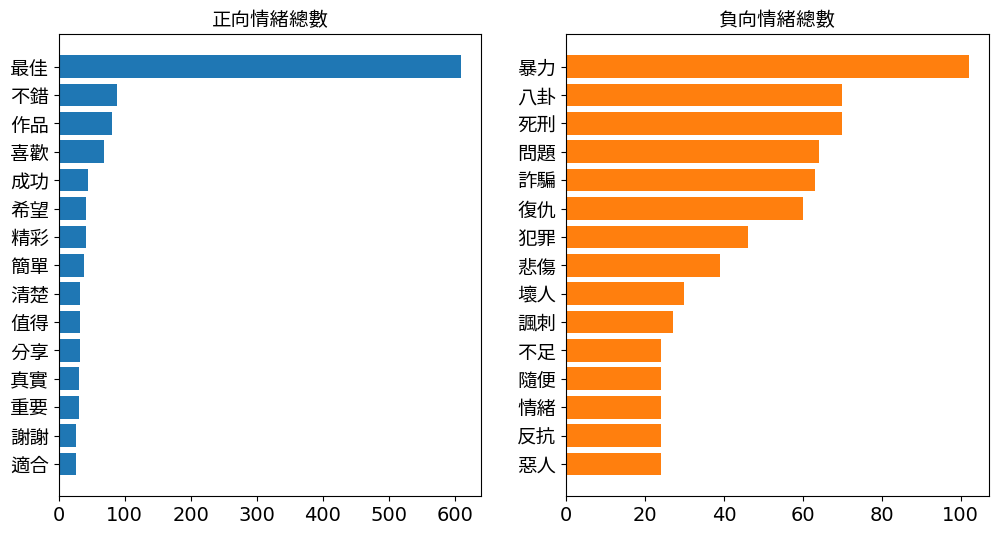

In [80]:
word_count = ptt_liwc_df_revise.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_yticks(range(len(pos["word"])))
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_yticks(range(len(neg["word"])))
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta


findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

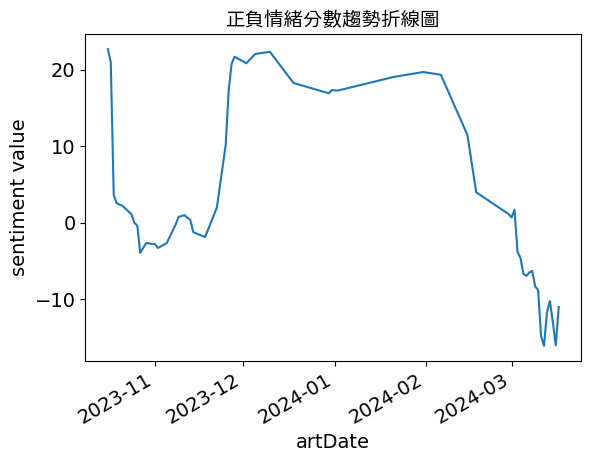

In [81]:
sentiment_count_revise = pd.DataFrame(
    ptt_liwc_df_revise.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count_revise['sentiments'] == "positive") | (sentiment_count_revise['sentiments'] == "negative") 
sentiment_count_revise = sentiment_count_revise.loc[mask]

sentiment_count_revise = sentiment_count_revise.rename(columns={0: "size"})
sentiment_count_revise = sentiment_count_revise.sort_values(["artDate"])

ptt_sentiment_value_revise = (
    sentiment_count_revise.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)

# sentiment 計算方式: positive - negative
ptt_sentiment_value_revise["sentiment_value"] = (
    ptt_sentiment_value_revise["positive"]
    - ptt_sentiment_value_revise["negative"]
)

# 繪製情緒分數趨勢圖
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value_revise["artDate"], ptt_sentiment_value_revise["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

### 3.10 文字雲

In [82]:
ptt_liwc_df_revise = pd.merge(ptt_liwc_df_revise, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
ptt_liwc_df_revise.head()

,artUrl,artDate,artTitle,artContent,word,sentiments,sentiment_class
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天,NaN,負向
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬,NaN,負向
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神,NaN,負向
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天,NaN,負向
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,2023-10-02,[問卦]今年是國片元年嗎？,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影,NaN,負向


In [83]:
sent_df = pd.merge(sent_df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
sent_df.head()

,artUrl,artTitle,artDate,artContent,sentence,sentiment_class
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影,負向
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播前照慣例都會放過幾天要上映的預告片,負向
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,之前加減都會放些國外的預告片,負向
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,結果昨天播了三部電影預告片全部都是臺灣國產,負向
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,周處除三害,負向


In [84]:
date = "2023-11-01"
end_date = "2023-12-01"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask]
ptt_df_wc

,artUrl,artDate,artTitle,artContent,word,sentiments,sentiment_class
996,https://www.ptt.cc/bbs/Gossiping/M.1698914419....,2023-11-02,[新聞]槍抵額頭扣扳機爆頭亡竹聯幫分會長平時,槍抵額頭扣扳機爆頭亡\n竹聯幫分會長平時高調愛PO臉書\nhttps://udn.com/n...,額頭,NaN,負向
997,https://www.ptt.cc/bbs/Gossiping/M.1698914419....,2023-11-02,[新聞]槍抵額頭扣扳機爆頭亡竹聯幫分會長平時,槍抵額頭扣扳機爆頭亡\n竹聯幫分會長平時高調愛PO臉書\nhttps://udn.com/n...,扳機,NaN,負向
998,https://www.ptt.cc/bbs/Gossiping/M.1698914419....,2023-11-02,[新聞]槍抵額頭扣扳機爆頭亡竹聯幫分會長平時,槍抵額頭扣扳機爆頭亡\n竹聯幫分會長平時高調愛PO臉書\nhttps://udn.com/n...,爆頭,NaN,負向
999,https://www.ptt.cc/bbs/Gossiping/M.1698914419....,2023-11-02,[新聞]槍抵額頭扣扳機爆頭亡竹聯幫分會長平時,槍抵額頭扣扳機爆頭亡\n竹聯幫分會長平時高調愛PO臉書\nhttps://udn.com/n...,竹聯幫,NaN,負向
1000,https://www.ptt.cc/bbs/Gossiping/M.1698914419....,2023-11-02,[新聞]槍抵額頭扣扳機爆頭亡竹聯幫分會長平時,槍抵額頭扣扳機爆頭亡\n竹聯幫分會長平時高調愛PO臉書\nhttps://udn.com/n...,會長,NaN,負向
...,...,...,...,...,...,...,...
26572,https://www.ptt.cc/bbs/movie/M.1700248085.A.B2...,2023-11-18,[雷]周處除三害,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,顯得,NaN,負向
26573,https://www.ptt.cc/bbs/movie/M.1700248085.A.B2...,2023-11-18,[雷]周處除三害,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,奇怪,affect,負向
26574,https://www.ptt.cc/bbs/movie/M.1700248085.A.B2...,2023-11-18,[雷]周處除三害,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,奇怪,negative,負向
26575,https://www.ptt.cc/bbs/movie/M.1700248085.A.B2...,2023-11-18,[雷]周處除三害,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,奇怪,affect,負向


In [85]:
date = "2023-11-01"
end_date = "2023-12-01"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]


word_count_count = pd.DataFrame(
    ptt_df_wc.groupby(["word"]).size()
).reset_index().rename(columns={0: "size"})
word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count

,word,size
460,荒謬,16
139,問題,12
566,阮經天,11
123,受害,9
598,風險,9
...,...,...
222,強大,1
221,店長,1
220,幾分鐘,1
219,年輕,1


In [86]:
date = "2023-11-01"
end_date = "2023-12-01"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]


word_count_count = pd.DataFrame(
    ptt_df_wc.groupby(["word"]).size()
).reset_index().rename(columns={0: "size"})
word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count

,word,size
460,荒謬,16
139,問題,12
566,阮經天,11
123,受害,9
598,風險,9
...,...,...
222,強大,1
221,店長,1
220,幾分鐘,1
219,年輕,1


In [87]:
# wordcloud 的 input 是 dictionary
wc_dict = dict(zip(word_count_count['word'], word_count_count['size']))
cloud = WordCloud(max_words=20, background_color='white', width=800, height = 400, font_path = FontPath)
cloud.generate_from_frequencies(wc_dict)
# 繪圖
plt.figure(figsize = (10,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

TypeError: 'dict' object is not callable

關鍵字出現了「男主」的關鍵字，對此有興趣想進一步分析

(-0.5, 799.5, 399.5, -0.5)

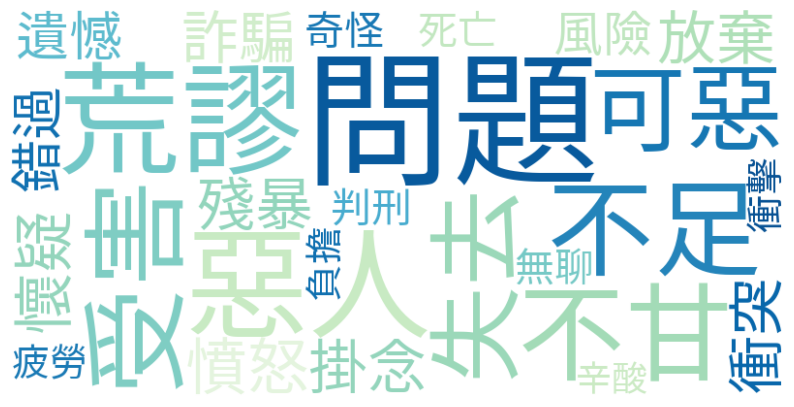

In [ ]:
date = "2023-11-01"
end_date = "2023-12-01"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & ( # 時間區間
    ptt_liwc_df_revise['sentiment_class'] == "負向")  & ( # 負面文章
    ptt_liwc_df_revise['artContent'].str.contains('阮經天')) & ( # 內文包含男主
    ptt_liwc_df_revise["sentiments"] == "negative") # 負面情緒字

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()

# wordcloud 的 input 是 dictionary
cloud = WordCloud(max_words=200, background_color='white', width=800, height = 400, font_path = FontPath, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (10,7))
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

In [ ]:
date = "2023-11-01"
end_date = "2023-12-01"
mask = (sent_df['artDate'] >= pd.Timestamp(date).date()) & (
    sent_df['artDate'] <= pd.Timestamp(end_date).date()) & (
    sent_df['sentiment_class'] == "負向") & (
    sent_df['artContent'].str.contains('阮經天')) & (
    sent_df['sentence'].str.contains('問題')) # 包含「問題」的句子

df_ = sent_df.loc[mask, ["artDate", "artContent", "sentence"]]
index_list = df_.index.tolist()


# 取得前後各5筆的索引 => 目的為查看包含該詞彙句子的上下文
surrounding_indices = []
for index in index_list:
    surrounding_indices.extend(range(index - 5, index + 6))

# 去除重複的索引，並確保不超出範圍
surrounding_indices = list(set(filter(lambda x: x >= 0 and x < len(sent_df), surrounding_indices)))

# 依據索引取得相應的資料
result_df = sent_df.iloc[surrounding_indices].sort_index()
result_df

,artUrl,artTitle,artDate,artContent,sentence,sentiment_class
6307,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,整場只有五個人xd,負向
6308,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,先說結論,負向
6309,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,我覺得這是一部讓我耳目ㄧ新的台灣電影,負向
6310,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,用小時候常常聽到的故事衍生出來,負向
6311,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,尤其是最後的邪教part,負向
6312,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,雖然早就知道教主有問題但一開始還真的包裝的很好,負向
6313,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,教堂大亂鬥也讓我想到金牌特務,負向
6314,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,最後被判刑的那段也很有臨場感,負向
6315,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,阮經天的演技以這部看起來我覺得很棒欸,負向
6316,https://www.ptt.cc/bbs/movie/M.1699664282.A.3C...,[好雷]周處除三害,2023-11-11,雷文防雷資訊頁\n\n\n\n~*-*~*-*~*-*~*-*~*-*~*-*~*-*~*-...,角色帶入感很強,負向


結果發現阮經天演的不錯，問題出在劇本將男主設定太強

## 4. CKIP 搭配 SnowNLP 情緒分析2

### 4.1. 套件
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- CKIP: 全名為Chinese Knowledge and Information Processing，中研院開發的中文自然語言處理工具。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。
- SnowNLP: SnowNLP是一個可以方便的處理中文文本內容的python類庫，是受到了TextBlob的啟發而寫的。SnowNLP主要功能包括斷詞、詞性標註、情緒分析、漢字轉拼音、繁體轉簡體、關鍵詞提取以及文本摘要等等。

In [6]:
# 引入套件
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import configparser, re, os, io
from wordcloud import WordCloud, ImageColorGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

In [5]:
# 確認當前工作目錄
%pwd

'c:\\Users\\penny\\Desktop\\SocialAnalysis_3_29'

In [7]:
# 將三份工具的模型路徑指向我們剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

## 4.2 CKIP處理

定義文字清理的相關function(跟上次課程做的事情一樣)

In [8]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    # print(article)
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    final_res = []
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    
#     paragraphs = list(filter(None, article.split("\n")))
    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            _logger.info("error")
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

In [9]:
# 自定義辭典
with open('dict/user_dict.txt') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[(3, {'陳桂林': 500.0, '桂林仔': 500.0, '阮經天': 500.0}), (5, {'周處除三害': 500.0})]


In [10]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
#     print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id,word,pos]) 
#         print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
#     print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3],entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    for index, row in data_df.iterrows(): # document level    
#         print(f"\ndocument {index}") 

        # clean data
        result = [] 
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2) # set dictionary 
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        for i, sentence in enumerate(flat_list): # sentence level
#             print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'],sentence])            
            temp_tokens = get_pos(row['system_id'],word_sentence_list[i],  pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'],entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [13]:
# flatten the lists of the list
#看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:10])

[['昨天去看我們金馬男神阮經天演的電影'], ['開播前照慣例都會放過幾天要上映的預告片'], ['之前加減都會放些國外的預告片'], ['結果昨天播了三部電影預告片全部都是臺灣國產'], ['周處除三害']]
['昨天去看我們金馬男神阮經天演的電影', '開播前照慣例都會放過幾天要上映的預告片', '之前加減都會放些國外的預告片', '結果昨天播了三部電影預告片全部都是臺灣國產', '周處除三害', '女鬼橋', '動物感傷の清晨', '尤其是動物感傷那部的預告片有夠煽情的啦', '回到重點', '今年是國片元年嗎']


In [14]:
df.dropna(subset=['artContent'], inplace=True)
pos_table, entity_table, sentence_table = get_nlp_result(df)

time costing: 410.7358150482178


In [15]:
pos_table.head() # word pos 列表


,system_id,word,pos
0,1,昨天,Nd
1,1,去,D
2,1,看,VC
3,1,我們,Nh
4,1,金馬,Na


In [16]:
entity_table.head() # word entity 列表


,system_id,word,ner
0,1,昨天,DATE
1,1,金馬,WORK_OF_ART
2,1,阮經天,PERSON
3,1,昨天,DATE
4,1,三,CARDINAL


In [17]:
sentence_table.head()


,system_id,sentence
0,1,昨天去看我們金馬男神阮經天演的電影
1,1,開播前照慣例都會放過幾天要上映的預告片
2,1,之前加減都會放些國外的預告片
3,1,結果昨天播了三部電影預告片全部都是臺灣國產
4,1,周處除三害


In [18]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 2771篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 2431篇有抓到ner

total posts numbers: 429
posts have NER: 424


In [19]:
# 將文章存成csv
pos_table.to_csv('raw_data/pos_table.csv', index = False)
entity_table.to_csv('raw_data/entity_table.csv', index = False)
sentence_table.to_csv('raw_data/sentence_table.csv', index = False)

## 4.3 探索分析 - NER

In [20]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("raw_data/pos_table.csv") 
entity_table = pd.read_csv("raw_data/entity_table.csv") 
sentence_table = pd.read_csv("raw_data/sentence_table.csv") 

### NER 種類分析
查看標註這個文集後辨識出哪一些實體種類<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [21]:
entity_table['ner'].unique()

array(['DATE', 'WORK_OF_ART', 'PERSON', 'CARDINAL', 'NORP', 'TIME',
       'EVENT', 'ORG', 'GPE', 'ORDINAL', 'LOC', 'MONEY', 'QUANTITY',
       'FAC', 'LANGUAGE', 'PERCENT', 'PRODUCT'], dtype=object)

In [22]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(8)
ner_count

,ner,count
12,PERSON,3255
4,GPE,1134
0,CARDINAL,781
1,DATE,490
8,NORP,349
10,ORG,202
16,WORK_OF_ART,165
7,MONEY,125


c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: ./raw_data/TaipeiSansTCBeta-Regular.ttf


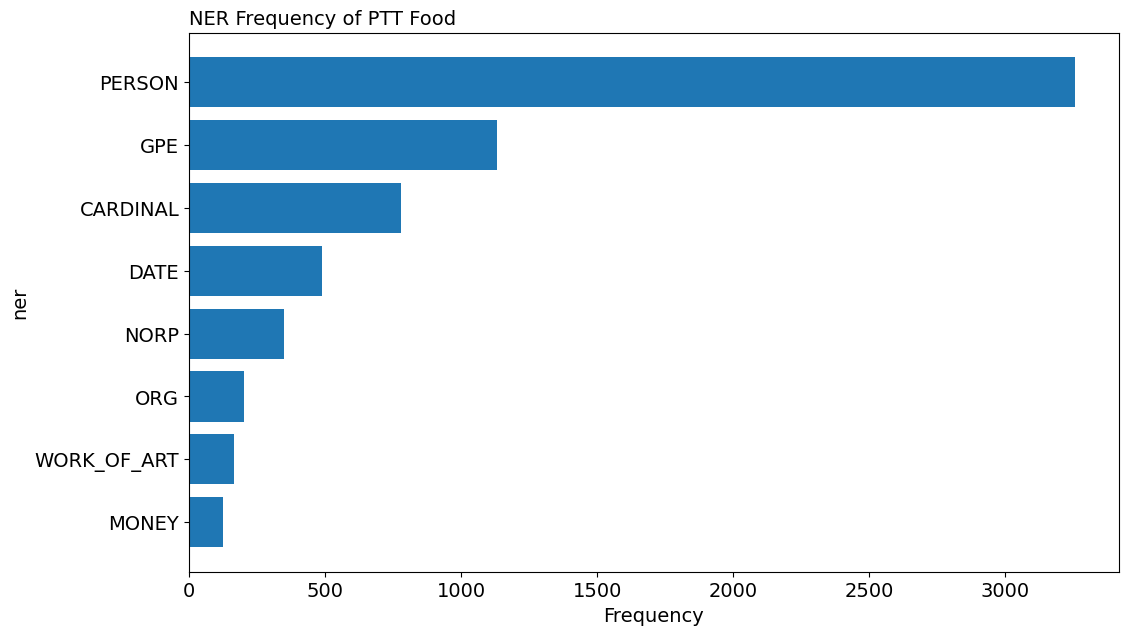

In [23]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT Food',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

出現最多的實體：1. 人名 2. 地區 3. 數字
可找出自己想要的實體去做更深入的分析

### 涉及到的人物、人名(PERSON)

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


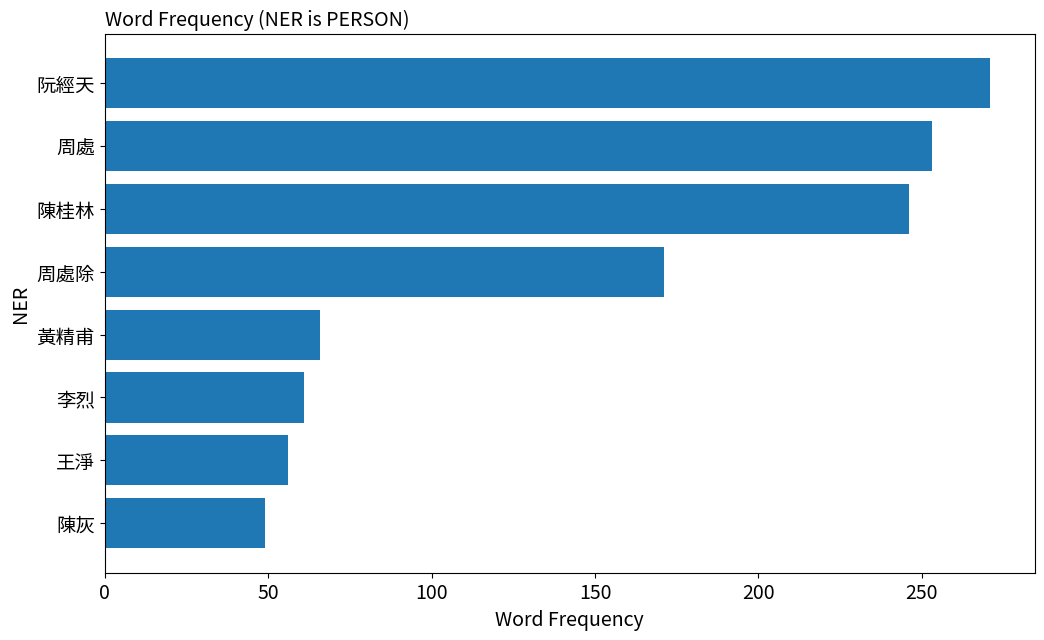

In [25]:
# 篩選ner為名詞的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

討論度最高的就是男主角的本名、角色名字

### 涉及到的地區(GPE)

c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


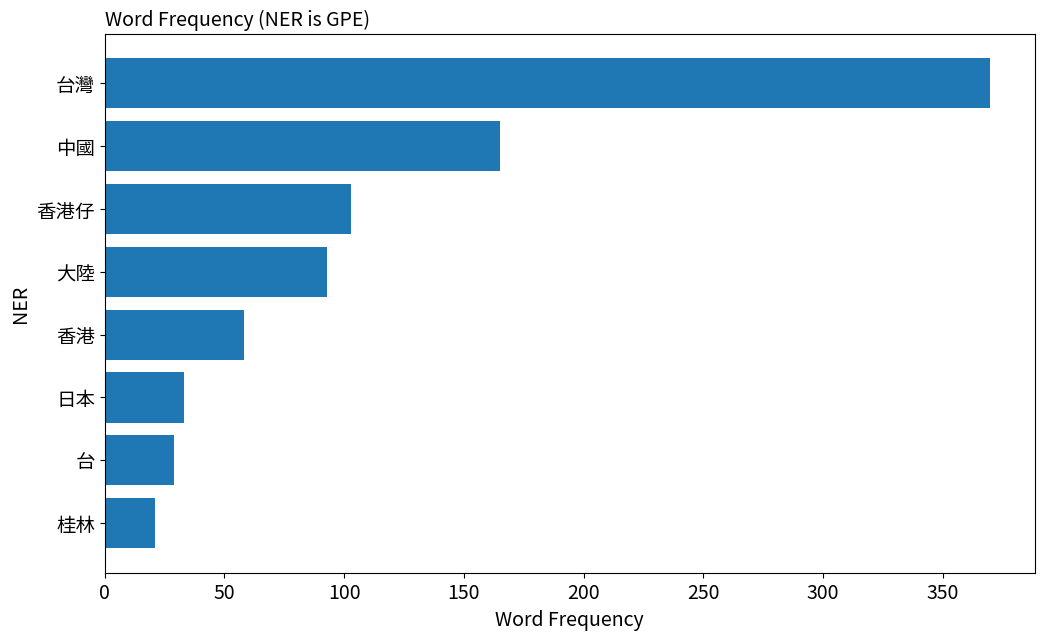

In [27]:
# 篩選ner為名詞的資料
l_noun = ["GPE"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is GPE)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

因為是台灣國片，並且在中國上映造成熱潮，而導演是香港人，裡面也有香港人的角色

### 涉及到的組織(ORG)

c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


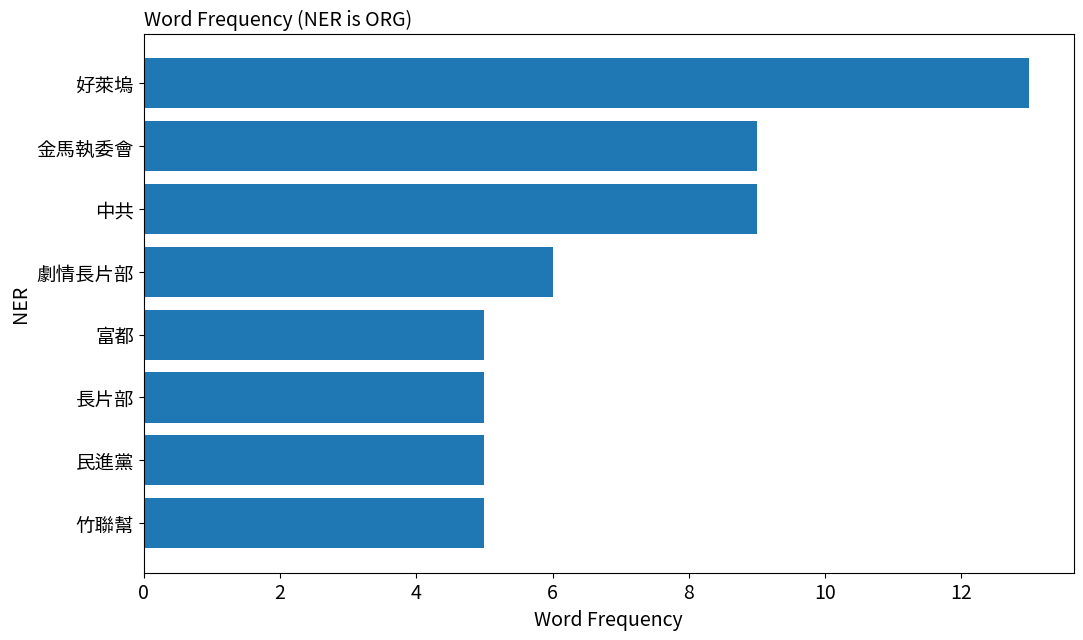

In [28]:
# 篩選ner為名詞的資料
l_noun = ["ORG"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 涉及到的民族、宗教、政治團體(NORP)

c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


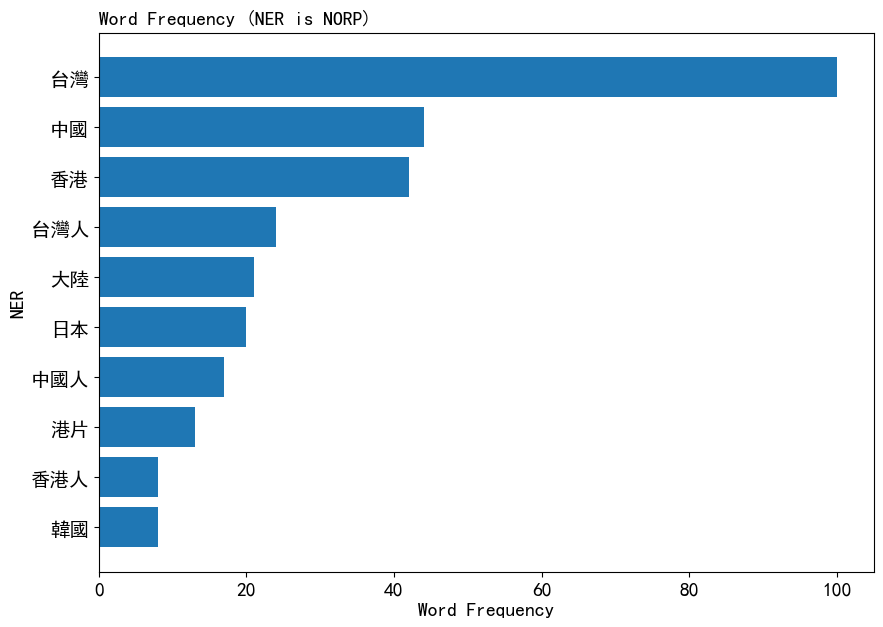

In [29]:
# 篩選ner為NORP的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

In [30]:
keyword_list = ['阮經天']
shu_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{shu_selected.shape[0]}篇相關貼文")
shu_selected

阮經天：111篇相關貼文


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,rainiem3m3,Gossiping,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",49.216.131.16,2023-10-07 01:35:28,ptt
5,6,https://www.ptt.cc/bbs/Gossiping/M.1696719803....,[新聞]（新片搶鮮看）《蒼鷺與少年》奇幻旅程,2023-10-08,lpbrother,Gossiping,備註請放最後面 違者新聞文章刪除\n1.媒體來源:自由時報\n\n2.記者署名:許世穎\n\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""a80568911"", ...",180.176.65.253,2023-10-09 01:28:34,ptt
7,8,https://www.ptt.cc/bbs/Gossiping/M.1697185829....,[問卦]台灣人包容度是不是過高了,2023-10-13,remember0412,Gossiping,只有我看到這個嗎\nhttps://i.imgur.com/P7BmXGq.jpg\n周處除...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""sorrywow"", ""...",27.52.166.181,2023-10-14 01:36:01,ptt
...,...,...,...,...,...,...,...,...,...,...,...
417,418,https://www.ptt.cc/bbs/movie/M.1710324130.A.6F...,[普雷]《周處除三害》難怪在台灣不紅,2024-03-13,fraternity,movie,在Netflix上出現一陣子了\n但是看到阮經天就感覺很無聊，完全不想點\n\n聽說在中國超...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""poru"", ""cmtC...",27.53.145.96,2024-03-14 02:02:17,ptt
423,424,https://www.ptt.cc/bbs/movie/M.1710480856.A.F5...,[負雷]周處除三害,2024-03-15,tim200513,movie,先說結論：浪費我兩個多小時\n\n整部片只有陳以文演技在水準之上\n連阮經天都還好\n更慘的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""rape5566"", ""...",42.77.119.20,2024-03-16 02:17:57,ptt
427,428,https://www.ptt.cc/bbs/movie/M.1710604377.A.13...,[新聞]阮經天被鎖定！億萬導演認了：我一直在打,2024-03-16,yu1164,movie,新聞網址：\nhttps://reurl.cc/13NpbW\n〔記者廖俐惠／台北報導〕阮經...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""jason88223"",...",180.218.234.142,2024-03-18 01:56:24,ptt
428,429,https://www.ptt.cc/bbs/movie/M.1710660412.A.06...,[新聞]《周處除三害》賣破21億！阮經天被敲碗,2024-03-17,HTC92,movie,新聞網址：\nhttps://star.ettoday.net/news/2701953\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""rtoday"", ""cm...",111.251.92.135,2024-03-18 01:56:26,ptt


## 4.4 探索分析 -POS

In [32]:
pos_table['pos'].unique()

array(['Nd', 'D', 'VC', 'Nh', 'Na', 'Nb', 'DE', 'VA', 'Ng', 'Neu', 'Nf',
       'VAC', 'Nc', 'Dk', 'Di', 'Neqa', 'SHI', 'A', 'VK',
       'PARENTHESISCATEGORY', 'Nep', 'Dfa', 'VH', 'T', 'VCL', 'VE', 'Cbb',
       'VJ', 'P', 'Caa', 'VG', 'VL', 'VHC', 'Ncd', 'VD', 'Cab', 'V_2',
       'Nes', 'FW', 'Dfb', 'VF', 'COMMACATEGORY', 'VB', 'Da', 'I', 'VI',
       'Nv', 'Neqb', 'Cba', 'DM', 'SEMICOLONCATEGORY', 'PERIODCATEGORY',
       'COLONCATEGORY'], dtype=object)

除了標點符號，大部分的POS都是哪一類
結果前三名為:普通名詞(Na)、副詞(D)、動作及物動詞(VC)

In [33]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

,pos,count
15,Na,16688
5,D,8350
36,VC,5538
42,VH,5250
6,DE,4223
16,Nb,3838
29,P,3257
17,Nc,2806
27,Nh,2373
25,Nf,2334


c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


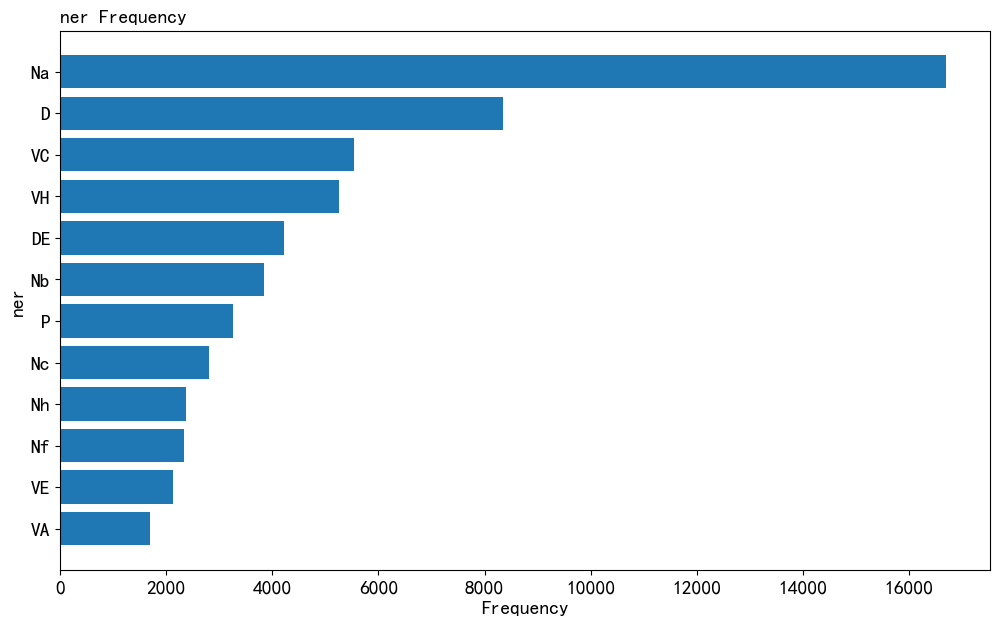

In [34]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

In [35]:
# 篩選pos為專有名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

,word,count
127,周處除三害,509
814,阮經天,273
870,陳桂林,248
125,周處,183
960,黃精甫,65
792,金馬獎,62
374,李烈,61
544,王淨,58
879,陳灰,46
835,陳以文,44


c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == "":


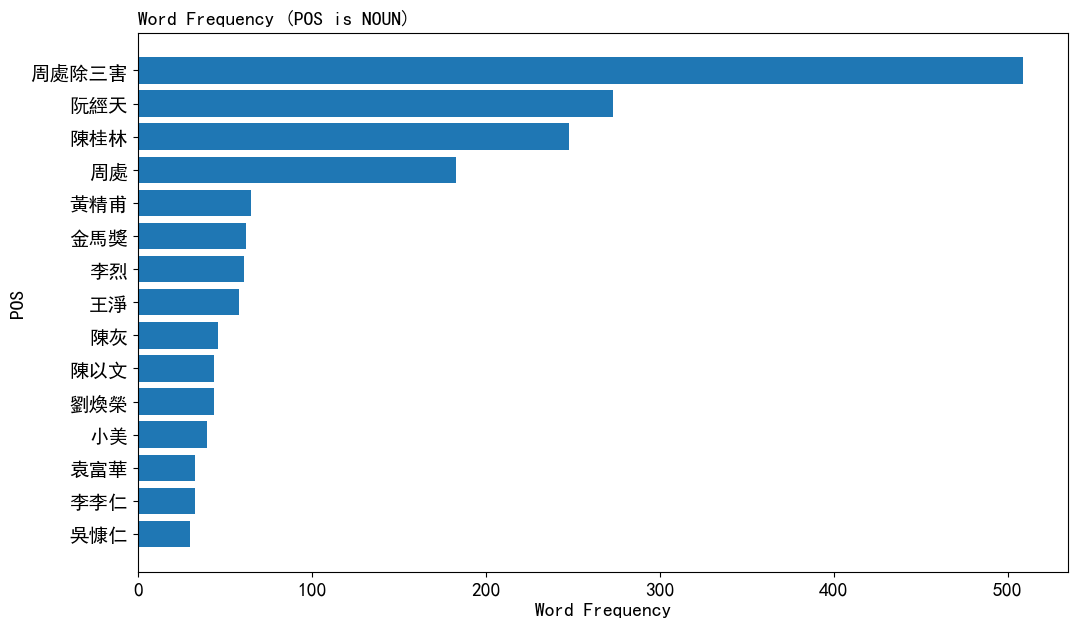

In [36]:
# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

In [37]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

,word,count
762,看完,54
1124,飾演,48
370,抄襲,46
9,主演,44
755,監製,38
681,演出,35
789,突破,31
288,幹掉,26
1020,追逐,25
803,累積,25


c:\Users\penny\anaconda3\envs\social_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


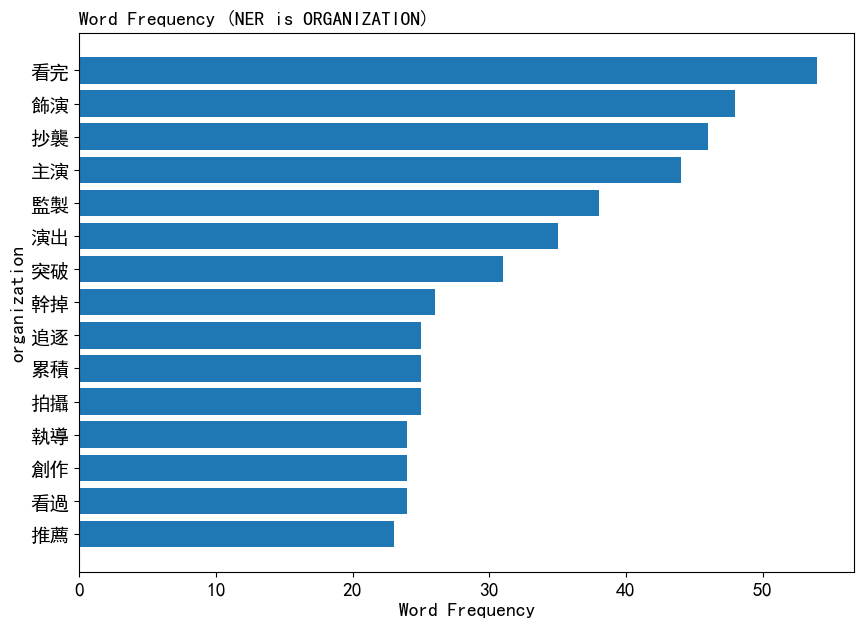

In [38]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORGANIZATION)',loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

「抄襲」的爭議占了相當高的比率，因為是動作暴力片，戲中片段「幹掉」「追逐」的詞彙也有高頻率的出現。


## 5. 利用SnowNLP進行情緒分析

In [50]:
from snownlp import SnowNLP
s1=SnowNLP('真的不知道在紅什麼')
s1.sentiments #負面0~1正面

0.6198216695077298

In [39]:
sentence_table = pd.read_csv("raw_data/sentence_table.csv") #匯資料

In [40]:
sentence_table

,system_id,sentence
0,1,昨天去看我們金馬男神阮經天演的電影
1,1,開播前照慣例都會放過幾天要上映的預告片
2,1,之前加減都會放些國外的預告片
3,1,結果昨天播了三部電影預告片全部都是臺灣國產
4,1,周處除三害
...,...,...
9041,430,，重新回到個演員身分再出發，去感受角色的變化轉折，沒有帥氣外表與華服陪襯，讓
9042,430,自己成為那個周處除三害裡那個只求留名殺無赦的主角陳桂林，終於再度創下佳績，
9043,430,走出感情波折與過往是非，阮經天重新展現歲青春期後的成熟男人味，未來還有哪些驚
9044,430,豔大眾的表演，非常令人期待


In [41]:
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,Hsins,Gossiping,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tearness"", ""...",61.223.222.252,2023-10-06 01:37:57,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,HNCB2880,Gossiping,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""spzper"", ""cm...",223.136.68.101,2023-10-07 01:34:56,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,rainiem3m3,Gossiping,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",49.216.131.16,2023-10-07 01:35:28,ptt
...,...,...,...,...,...,...,...,...,...,...,...
425,426,https://www.ptt.cc/bbs/movie/M.1710573924.A.E0...,[普雷]周處除三害,2024-03-16,adagiox,movie,周處除三害的三害香港仔、尊者、陳桂林到底代表的是那三害？\n\n香港仔代表的其實是資本主義，...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""n3688"", ""cmt...",180.217.249.254,2024-03-18 01:56:22,ptt
426,427,https://www.ptt.cc/bbs/movie/M.1710601237.A.9F...,"Re:[討論]原來""熱辣滾燙""是改編日片""百元之戀""呀!!",2024-03-16,taot917,movie,不知道在反三小，我覺得看電影就看電影\n一直計較奇怪的點\n\n當男人戀愛時，也是翻拍阿！！...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""ilovedirk41""...",123.192.217.112,2024-03-18 01:56:24,ptt
427,428,https://www.ptt.cc/bbs/movie/M.1710604377.A.13...,[新聞]阮經天被鎖定！億萬導演認了：我一直在打,2024-03-16,yu1164,movie,新聞網址：\nhttps://reurl.cc/13NpbW\n〔記者廖俐惠／台北報導〕阮經...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""jason88223"",...",180.218.234.142,2024-03-18 01:56:24,ptt
428,429,https://www.ptt.cc/bbs/movie/M.1710660412.A.06...,[新聞]《周處除三害》賣破21億！阮經天被敲碗,2024-03-17,HTC92,movie,新聞網址：\nhttps://star.ettoday.net/news/2701953\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""rtoday"", ""cm...",111.251.92.135,2024-03-18 01:56:26,ptt


In [42]:

sentiment_date = pd.merge(sentence_table,df[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head()

,system_id,sentence,artDate,dataSource
0,1,昨天去看我們金馬男神阮經天演的電影,2023-10-02,ptt
1,1,開播前照慣例都會放過幾天要上映的預告片,2023-10-02,ptt
2,1,之前加減都會放些國外的預告片,2023-10-02,ptt
3,1,結果昨天播了三部電影預告片全部都是臺灣國產,2023-10-02,ptt
4,1,周處除三害,2023-10-02,ptt


In [43]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date

,system_id,sentence,artDate,dataSource,sentimentValue
0,1,昨天去看我們金馬男神阮經天演的電影,2023-10-02,ptt,0.984942
1,1,開播前照慣例都會放過幾天要上映的預告片,2023-10-02,ptt,0.211599
2,1,之前加減都會放些國外的預告片,2023-10-02,ptt,0.416875
3,1,結果昨天播了三部電影預告片全部都是臺灣國產,2023-10-02,ptt,0.377126
4,1,周處除三害,2023-10-02,ptt,0.443628
...,...,...,...,...,...
9041,430,，重新回到個演員身分再出發，去感受角色的變化轉折，沒有帥氣外表與華服陪襯，讓,2024-03-17,ptt,0.000114
9042,430,自己成為那個周處除三害裡那個只求留名殺無赦的主角陳桂林，終於再度創下佳績，,2024-03-17,ptt,0.000014
9043,430,走出感情波折與過往是非，阮經天重新展現歲青春期後的成熟男人味，未來還有哪些驚,2024-03-17,ptt,0.988852
9044,430,豔大眾的表演，非常令人期待,2024-03-17,ptt,0.877868


In [44]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

count    9.046000e+03
mean     4.735452e-01
std      3.310765e-01
min      1.336222e-07
25%      1.552676e-01
50%      4.796787e-01
75%      7.787037e-01
max      9.999997e-01
Name: sentimentValue, dtype: float64

<AxesSubplot:>

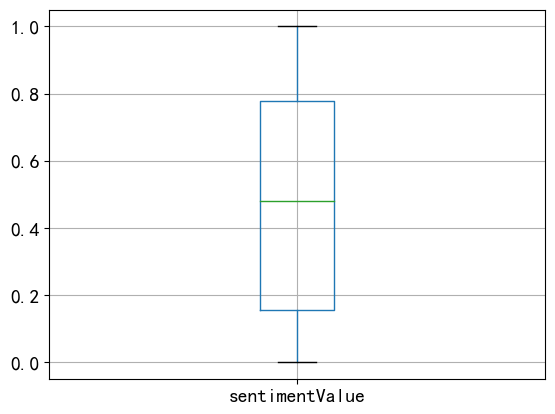

In [45]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

正面評價和負面情緒蠻平均的

In [51]:
sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count

,artDate,sentimentValue
0,2023-10,0.483140
1,2023-11,0.542554
2,2023-12,0.514369
3,2024-01,0.580038
4,2024-02,0.562326
5,2024-03,0.444570


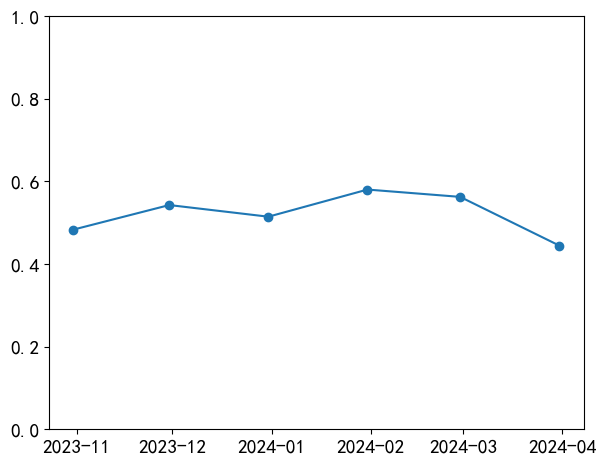

In [47]:

months = sentiment_count['artDate']
y = sentiment_count['sentimentValue']

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate
plt.tight_layout()
plt.ylim(0,1)

plt.show()

周處除三害上映時間:
+ 2023年10月6日（台灣）
+ 2023年11月2日（香港、澳門）
+ 2024年3月1日（中國大陸）同時也是Netflix串流平台上線


### 詞彙探索

選擇時間與情緒分數的門檻，來看情緒句子的結果

In [81]:
#正面
filter_sentiment = sent_date[sent_date['artDate']=='2024-03']
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] > 0.8]  

filter_sentiment

,system_id,sentence,artDate,dataSource,sentimentValue
470,27,看中國人對這部評價超高,2024-03,ptt,0.991942
471,27,豆瓣高達,2024-03,ptt,0.935883
487,29,更衝上當日電影票房第,2024-03,ptt,0.882250
500,30,"房已突破人民幣,萬元約新台幣億元，更度站上當日電影票房第",2024-03,ptt,0.928644
502,30,房也讓電影相關話題在社群發酵，包含先前傳出電影大量暴力血腥內容遭刪減，以及金曲,2024-03,ptt,0.958070
...,...,...,...,...,...
9032,430,屆金馬獎影帝后合照的重要時刻,2024-03,ptt,0.917743
9034,430,歷屆獲獎者合影，堪稱是金馬影史上的榮耀高光時刻，影帝陳松勇因中風患有糖尿病，,2024-03,ptt,0.939014
9035,430,身體不適因先行離場，沒想到阮經天頒完獎後以趕拍軍中樂園體力無法負荷，拍片太,2024-03,ptt,0.993512
9043,430,走出感情波折與過往是非，阮經天重新展現歲青春期後的成熟男人味，未來還有哪些驚,2024-03,ptt,0.988852


In [88]:
#負面
filter_sentiment_n= sent_date[sent_date['artDate']=='2024-03']
filter_sentiment_n= filter_sentiment_n.loc[filter_sentiment_n['sentimentValue'] < 0.2]  

filter_sentiment_n

,system_id,sentence,artDate,dataSource,sentimentValue
474,27,昨天上映天票房就萬,2024-03,ptt,0.093542
476,27,請問這部國片能看嗎,2024-03,ptt,0.164896
477,28,如題啦,2024-03,ptt,0.125000
479,28,昨天跟他媽媽去參加個宗教團體活動啦,2024-03,ptt,0.056801
481,28,就突然吐黑水昏倒,2024-03,ptt,0.047510
...,...,...,...,...,...
9036,430,累自行返家，遭到外界撻伐，連經紀人李烈都不諒解，兩人冷戰了年，直到決定合作,2024-03,ptt,0.001110
9038,430,在外界不諒解下，阮經天過去年陷入低潮期，離開台灣，轉赴大陸拍攝電視劇扶搖,2024-03,ptt,0.115168
9039,430,舌尖上的心跳，始終沒有再創佳績,2024-03,ptt,0.080350
9041,430,，重新回到個演員身分再出發，去感受角色的變化轉折，沒有帥氣外表與華服陪襯，讓,2024-03,ptt,0.000114


In [82]:
#正面
# 把時間分數和之前斷詞的 token table 做 join
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]

# 篩選掉只有單個字元的結果
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

pos_words.head(30)

,system_id,sentimentValue,word
0,27,0.991942,/////
3,27,0.991942,中國人
7,27,0.991942,評價
8,27,0.991942,超高
9,27,0.991942,豆瓣
10,27,0.991942,高達
11,27,0.991942,/////
13,27,0.991942,昨天
14,27,0.991942,上映
15,27,0.991942,天票房


In [83]:
# 自定停用字
with open('dict/stop_words.txt') as f:
    stop_words = f.read().splitlines()

print(stop_words)

[',', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '可否', '有無', '再', '本來', '是不是', '一個', '這種', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎喲', '唉', '我', '我們', '按', '按照', '依照', '吧', '吧噠', '把', '罷了', '被', '本', '本著', '比', '比方', '比如', '鄙人', '彼', '彼此', '邊', '別', '別的', '別說', '並', '並且', '不比', '不成', '不單', '不但', '不獨', '不管', '不光', '不過', '不僅', '不拘', '不論', '不怕', '不然', '不如', '不特', '不惟', '不問', '不只', '朝', '朝著', '趁', '趁著', '乘', '沖', '除', '除此之外', '除非', '除了', '此', '此間', '此外', '從', '從而', '打', '待', '但', '但是', '當', '當著', '到', '得', '的', '的話', '等', '等等', '地', '第', '叮咚', '對', '對於', '多', '多少', '而', '而況', '而且', '而是', '而外', '而言', '而已', '爾後', '反過來', '反過來說', '反之', '非但', '非徒', '否則', '嘎', '嘎登', '該', '趕', '個', '各', '各個', '各位', '各種', '各自', '給', '根據', '跟', '故', '故此', '固然', '關於', '管', '歸', '果然', '果真', '過', '哈', '哈哈', '呵', '和', '何', '何處', '何況', '何時', '嘿', '哼', '哼唷', '呼哧', '乎', '嘩', '還是', '還有', '換句話說', '換言之', '或', '或是', '或者', '極了', '及', '及其', '及至', '即', '即便', '即或', '即令', '即若', '即使', '幾', '幾時', '己', '既', '既然', '既是', 

In [84]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('昨天','今天','最後'))
stop_words_pos = set(stop_words_pos)



In [85]:
# 設定中文字形
font_path = './raw_data/TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")
font_path


'./raw_data/TaipeiSansTCBeta-Regular.ttf'

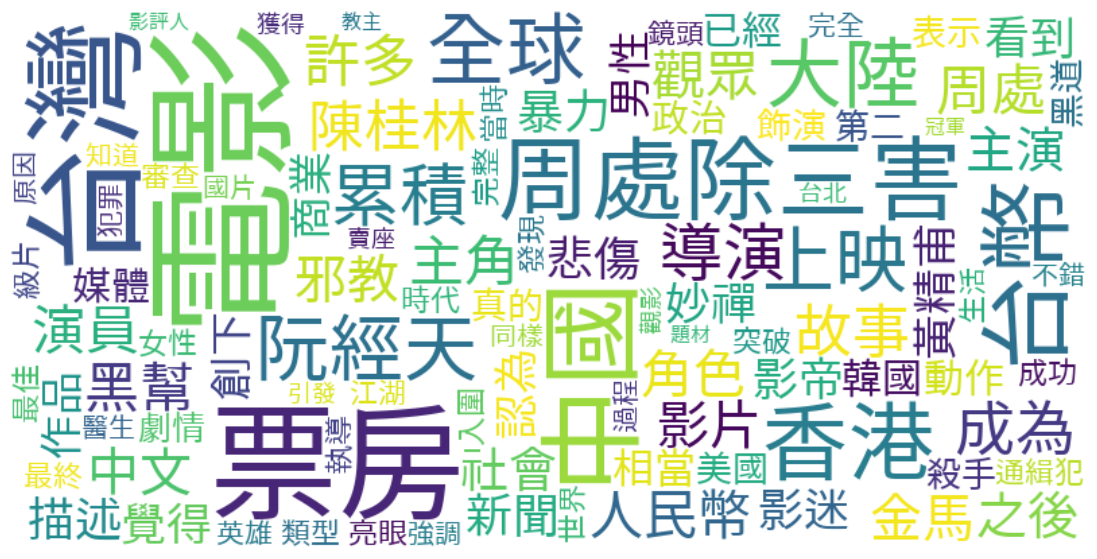

In [86]:
wordcloud.generate(' '.join(pos_words['word']))

# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

有以上詞會出現在正向文章當中

------------------------------------------------------------------------